<a href="https://colab.research.google.com/github/Yash-Agarwal-4a5h/Machine-Learning/blob/main/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# # from google.colab import drive
# # drive.mount('/content/drive')

# import pandas as pd

# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
# df = pd.read_csv(url, header=None)
# df.head()


In [22]:
df=pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [23]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

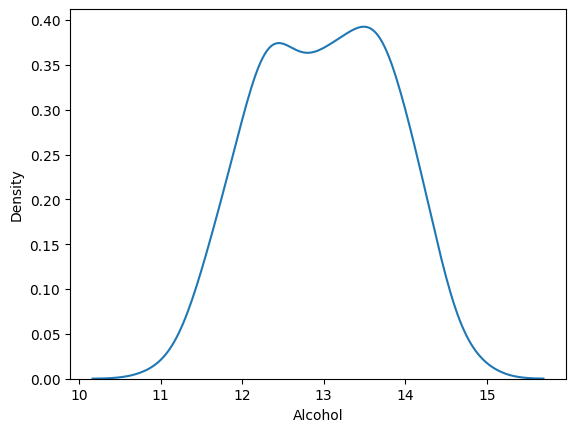

In [24]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

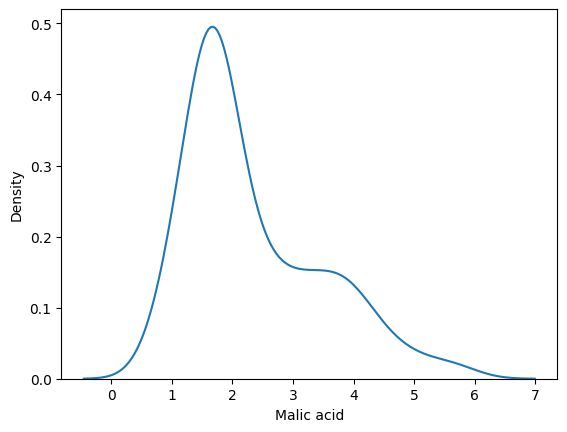

In [25]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

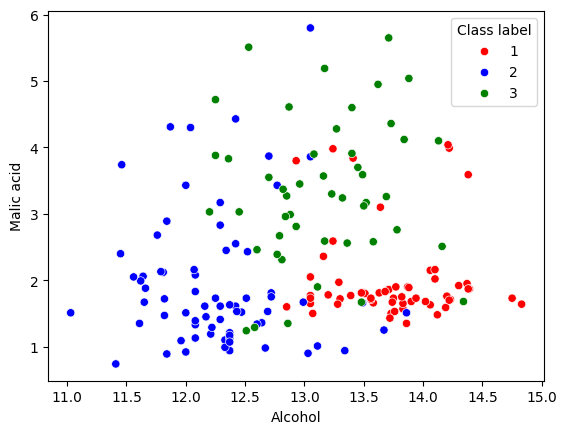

In [29]:
color_dict={1:'red', 3:'green', 2:'blue'}
sns.scatterplot(data=df,x='Alcohol', y='Malic acid', hue=df['Class label'], palette=color_dict)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124, 2), (124,), (54, 2), (54,))

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
# Round of karta h decimal values ko 1 decimal tak
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


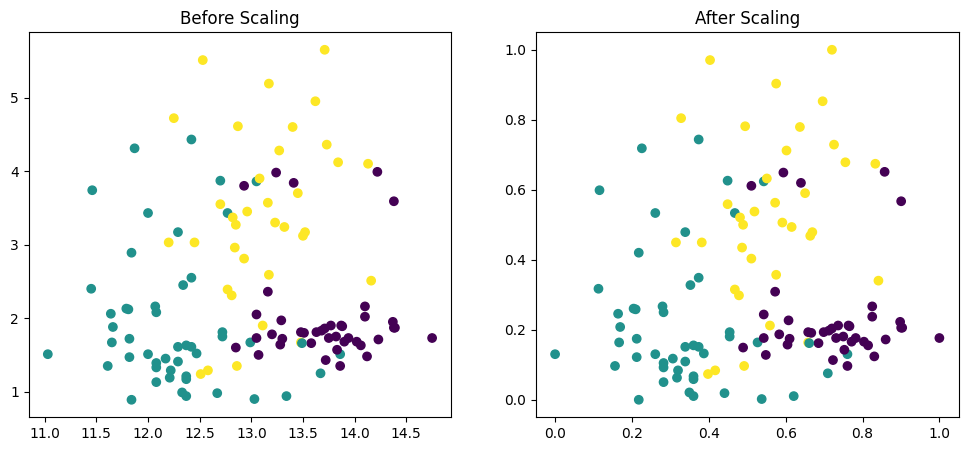

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

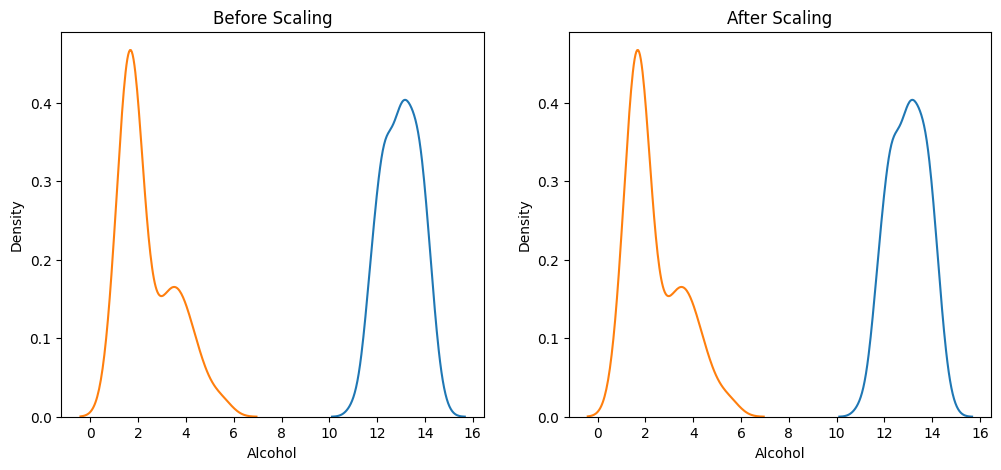

In [44]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax2)
sns.kdeplot(X_train['Malic acid'], ax=ax2)

<Axes: title={'center': 'Alcohol distribution After scaling'}, xlabel='Alcohol', ylabel='Density'>

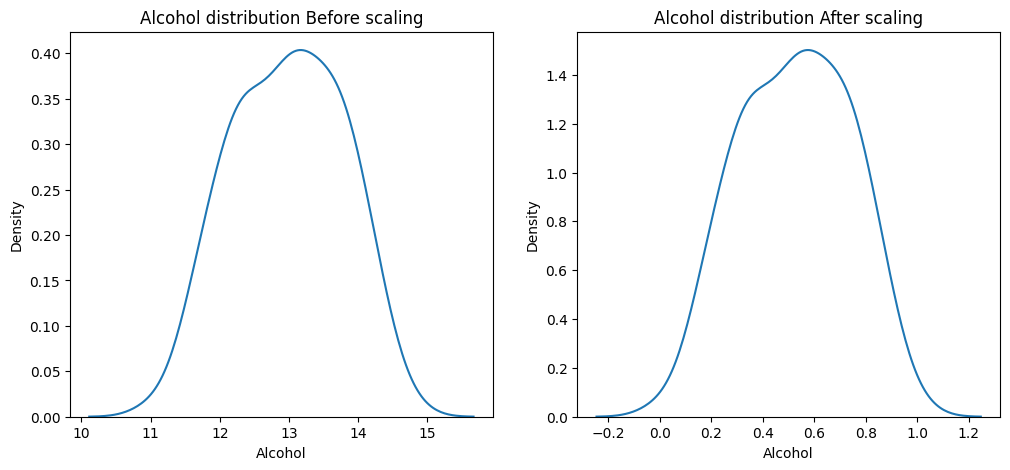

In [46]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Alcohol distribution Before scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

ax2.set_title('Alcohol distribution After scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)


<Axes: title={'center': 'Malic acid distribution After scaling'}, xlabel='Malic acid', ylabel='Density'>

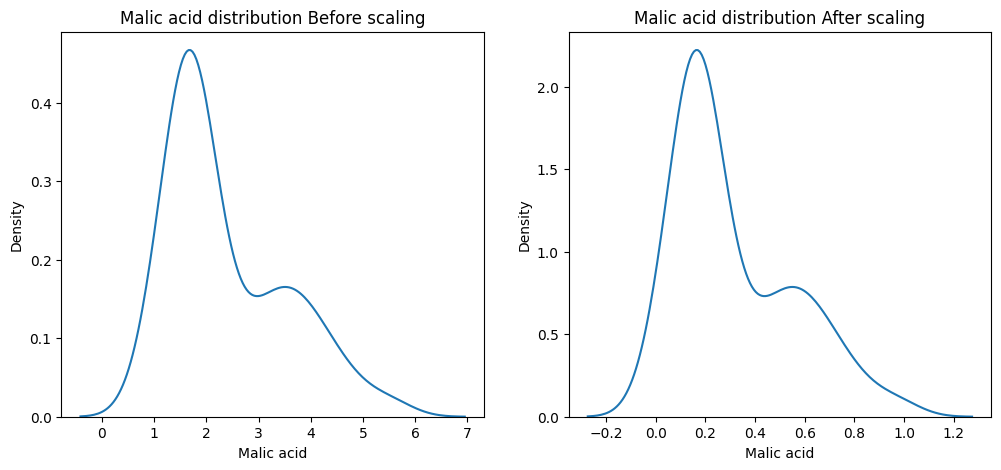

In [47]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Malic acid distribution Before scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('Malic acid distribution After scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)